In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
data = pd.read_csv('dane_z_badan_dzwignicy.csv', index_col=0)

In [3]:
display(data)

,Data,Ciężar ładunku [T],Długość wysięgnika [m],Odległość od osi [m],Wysokość podnoszenia [m],"Maksymalne, chwilowe zużycie ON [l/h]",Dzienne zużycie ON [l/8h],Cena hurtowa ON 1000l [PLN],"Maksymalne, chwilowe zużycie energii elektrycznej [kW]",Dzienne zużycie energii elektrycznej [kW/8h],Cena energii elektrycznej [kWh],Koszt dzienny [PLN],Prędkość wiatru [km/h],Prędkość wiatru [m/s],Temperatura [C],Ciśnienie [hPa]
Nr. Pomiaru,,,,,,,,,,,,,,,,
1,11/4/2019,5,13.2,2,8,15.0,48.0,NaN,NaN,NaN,NaN,NaN,10.25,2.85,10.25,995.0
2,11/4/2019,8,13.2,2,8,15.0,48.0,NaN,NaN,NaN,NaN,NaN,10.25,2.85,10.25,995.0
3,11/4/2019,15,13.2,2,8,15.0,48.0,NaN,NaN,NaN,NaN,NaN,10.25,2.85,10.25,995.0
4,11/5/2019,5,13.2,1,10,14.9,47.2,4241.0,NaN,NaN,NaN,200.17520,7.00,1.94,8.00,999.5
5,11/5/2019,8,13.2,1,10,14.9,47.2,4241.0,NaN,NaN,NaN,200.17520,7.00,1.94,8.00,999.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,2/27/2023,25,22.2,19,10,NaN,NaN,NaN,39.6,79.2,0.4843,38.35656,13.00,3.61,1.00,1026.0
945,2/27/2023,40,22.2,19,10,NaN,NaN,NaN,39.6,79.2,0.4843,38.35656,13.00,3.61,1.00,1026.0
946,2/28/2023,15,26.7,26,4,NaN,NaN,NaN,40.0,80.1,0.4843,38.79243,12.00,3.33,0.00,1030.0


In [4]:
print((data.isnull().sum() / data.shape[0] * 100).round(2))
# missing data in %

Data                                                       0.00
Ciężar ładunku [T]                                         0.00
Długość wysięgnika [m]                                     0.00
Odległość od osi [m]                                       0.00
Wysokość podnoszenia [m]                                   0.00
Maksymalne, chwilowe zużycie ON [l/h]                     87.66
Dzienne zużycie ON [l/8h]                                 87.66
Cena hurtowa ON 1000l [PLN]                               90.82
Maksymalne, chwilowe zużycie energii elektrycznej [kW]    12.34
Dzienne zużycie energii elektrycznej [kW/8h]              12.34
Cena energii elektrycznej [kWh]                           12.34
Koszt dzienny [PLN]                                        3.16
Prędkość wiatru [km/h]                                     0.00
Prędkość wiatru [m/s]                                      0.00
Temperatura [C]                                            0.00
Ciśnienie [hPa]                         

In [5]:
data_nan = data.copy()
nan_cols = ['Maksymalne, chwilowe zużycie ON [l/h]', 'Dzienne zużycie ON [l/8h]', 'Maksymalne, chwilowe zużycie energii elektrycznej [kW]', 'Dzienne zużycie energii elektrycznej [kW/8h]', 'Cena hurtowa ON 1000l [PLN]', 'Cena energii elektrycznej [kWh]']
for col in nan_cols:
  data_nan[f'{col} NaN'] = np.where(data[col].isnull(), 1, 0)
print(data_nan.groupby([f'{nan_cols[0]} NaN'])[f'{nan_cols[2]} NaN'].mean())
print(data_nan.groupby([f'{nan_cols[1]} NaN'])[f'{nan_cols[3]} NaN'].mean())
print(data_nan.groupby([f'{nan_cols[4]} NaN'])[f'{nan_cols[5]} NaN'].mean())
# MNAR - using oil or electricity

Maksymalne, chwilowe zużycie ON [l/h] NaN
0    1.0
1    0.0
Name: Maksymalne, chwilowe zużycie energii elektrycznej [kW] NaN, dtype: float64
Dzienne zużycie ON [l/8h] NaN
0    1.0
1    0.0
Name: Dzienne zużycie energii elektrycznej [kW/8h] NaN, dtype: float64
Cena hurtowa ON 1000l [PLN] NaN
0    1.000000
1    0.034843
Name: Cena energii elektrycznej [kWh] NaN, dtype: float64


In [6]:
# two types of power
energy = data[(data.iloc[:,5].isnull()) & (data.iloc[:,6].isnull()) & (data.iloc[:,7].isnull())]
energy = energy.drop(data.columns[5:8], axis=1)
on = data[(data.iloc[:,8].isnull()) & (data.iloc[:,9].isnull()) & (data.iloc[:,10].isnull())]
on = on.drop(data.columns[8:11], axis=1)
#nan_ON = data.loc[(data['Cena hurtowa ON 1000l [PLN]'].isna() & data['Cena energii elektrycznej [kWh]'].isna()) | (~data['Cena hurtowa ON 1000l [PLN]'].isna() & data['Cena energii elektrycznej [kWh]'].isna())]

In [7]:
print('Dane z zasilania energią elektryczną')
display(energy)

Dane z zasilania energią elektryczną


,Data,Ciężar ładunku [T],Długość wysięgnika [m],Odległość od osi [m],Wysokość podnoszenia [m],"Maksymalne, chwilowe zużycie energii elektrycznej [kW]",Dzienne zużycie energii elektrycznej [kW/8h],Cena energii elektrycznej [kWh],Koszt dzienny [PLN],Prędkość wiatru [km/h],Prędkość wiatru [m/s],Temperatura [C],Ciśnienie [hPa]
Nr. Pomiaru,,,,,,,,,,,,,
118,1/3/2022,5,13.2,2,3,39.6,79.2,0.4843,38.35656,34.0,9.44,8.5,1009.50
119,1/3/2022,8,13.2,2,3,39.6,79.2,0.4843,38.35656,34.0,9.44,8.5,1009.50
120,1/3/2022,15,13.2,1,3,39.6,79.2,0.4843,38.35656,34.0,9.44,8.5,1009.50
121,1/4/2022,5,13.2,1,10,39.8,80.0,0.4843,38.74400,37.5,10.42,8.5,1000.25
122,1/4/2022,8,13.2,1,10,39.8,80.0,0.4843,38.74400,37.5,10.42,8.5,1000.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,2/27/2023,25,22.2,19,10,39.6,79.2,0.4843,38.35656,13.0,3.61,1.0,1026.00
945,2/27/2023,40,22.2,19,10,39.6,79.2,0.4843,38.35656,13.0,3.61,1.0,1026.00
946,2/28/2023,15,26.7,26,4,40.0,80.1,0.4843,38.79243,12.0,3.33,0.0,1030.00


In [8]:
display(on)
print('Dane z zasilania olejem napędowym')

,Data,Ciężar ładunku [T],Długość wysięgnika [m],Odległość od osi [m],Wysokość podnoszenia [m],"Maksymalne, chwilowe zużycie ON [l/h]",Dzienne zużycie ON [l/8h],Cena hurtowa ON 1000l [PLN],Koszt dzienny [PLN],Prędkość wiatru [km/h],Prędkość wiatru [m/s],Temperatura [C],Ciśnienie [hPa]
Nr. Pomiaru,,,,,,,,,,,,,
1,11/4/2019,5,13.2,2,8,15.0,48.0,NaN,NaN,10.25,2.85,10.25,995.00
2,11/4/2019,8,13.2,2,8,15.0,48.0,NaN,NaN,10.25,2.85,10.25,995.00
3,11/4/2019,15,13.2,2,8,15.0,48.0,NaN,NaN,10.25,2.85,10.25,995.00
4,11/5/2019,5,13.2,1,10,14.9,47.2,4241.0,200.1752,7.00,1.94,8.00,999.50
5,11/5/2019,8,13.2,1,10,14.9,47.2,4241.0,200.1752,7.00,1.94,8.00,999.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,12/30/2019,1,72.0,9,37,15.0,48.0,NaN,NaN,21.50,5.97,3.75,1026.00
114,12/30/2019,1,72.0,10,38,15.0,48.0,NaN,NaN,21.50,5.97,3.75,1026.00
115,12/31/2019,1,72.0,5,40,14.9,47.2,4449.0,209.9928,24.75,6.88,3.00,1025.75


Dane z zasilania olejem napędowym


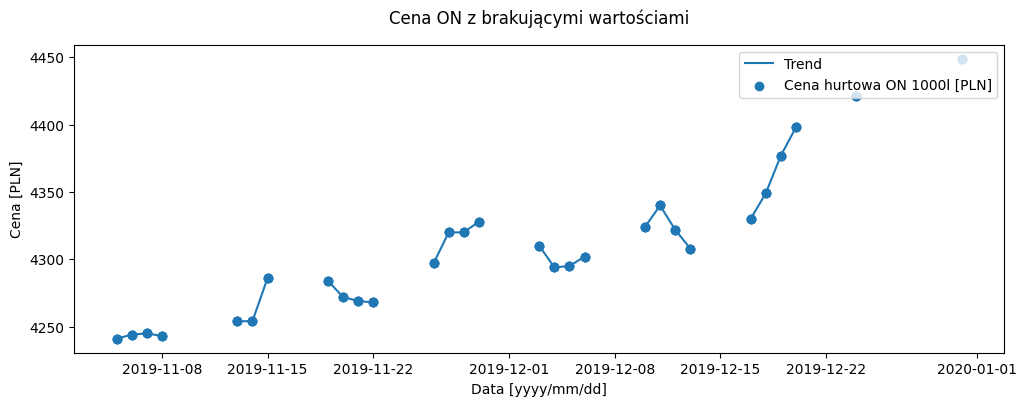

In [9]:
# oil's price trend with missing values
plt.figure(figsize=(12, 4))
on['Data'] = pd.to_datetime(on['Data'], format='%m/%d/%Y') 
plt.plot(on['Data'], on['Cena hurtowa ON 1000l [PLN]'], label='Trend', color='tab:blue')
plt.scatter(on['Data'], on['Cena hurtowa ON 1000l [PLN]'], label='Cena hurtowa ON 1000l [PLN]', color='tab:blue')
plt.xlabel('Data [yyyy/mm/dd]')
plt.ylabel('Cena [PLN]')
plt.title('Cena ON z brakującymi wartościami', pad=15)
plt.legend(loc='upper right')
plt.show()

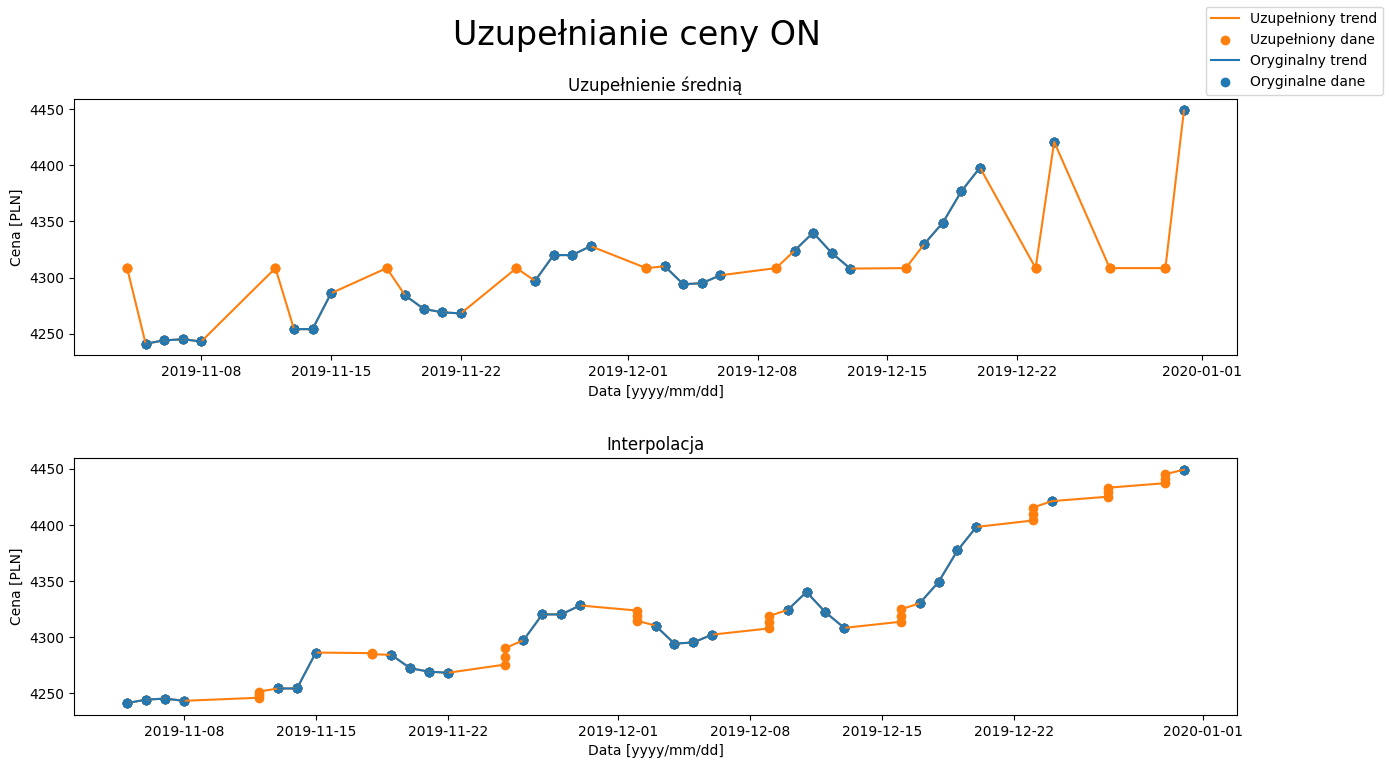

In [10]:
fig, axes = plt.subplots(2, figsize=(15, 8))

na_index = on.loc[on['Cena hurtowa ON 1000l [PLN]'].isnull()].index
# data enhancement - mean
on_mean = on.copy()
on_mean['Cena hurtowa ON 1000l [PLN]'] = on_mean['Cena hurtowa ON 1000l [PLN]'].fillna(on['Cena hurtowa ON 1000l [PLN]'].mean())
# data enhancement - interpolated values
on_inter = on.copy()
on_inter['Cena hurtowa ON 1000l [PLN]'] = on_inter['Cena hurtowa ON 1000l [PLN]'].interpolate()
# two cases
axes[0].set_title('Uzupełnienie średnią')
axes[1].set_title('Interpolacja')
axes[0].plot(on_mean['Data'], on_mean['Cena hurtowa ON 1000l [PLN]'], label='Uzupełniony trend', color='tab:orange')
axes[1].plot(on_inter['Data'], on_inter['Cena hurtowa ON 1000l [PLN]'], label='Uzupełnione trend', color='tab:orange')
axes[0].scatter(on_mean['Data'], on_mean['Cena hurtowa ON 1000l [PLN]'], label='Uzupełniony dane', color='tab:orange')
axes[1].scatter(on_inter['Data'], on_inter['Cena hurtowa ON 1000l [PLN]'], label='Uzupełnione dane', color='tab:orange')

for ax in axes:
  ax.set_xlabel('Data [yyyy/mm/dd]')
  ax.set_ylabel('Cena [PLN]')
  ax.plot(on['Data'], on['Cena hurtowa ON 1000l [PLN]'], label='Oryginalny trend', color='tab:blue')
  ax.scatter(on['Data'], on['Cena hurtowa ON 1000l [PLN]'], label='Oryginalne dane', color='tab:blue')

handles, labels = axes[0].get_legend_handles_labels() # to not repeat legend
fig.legend(handles, labels, loc='upper right')

plt.subplots_adjust(hspace=0.4)
plt.suptitle('Uzupełnianie ceny ON', size=24)
plt.show()

In [11]:
print((energy.isnull().sum() / energy.shape[0] * 100).round(2))

Data                                                      0.0
Ciężar ładunku [T]                                        0.0
Długość wysięgnika [m]                                    0.0
Odległość od osi [m]                                      0.0
Wysokość podnoszenia [m]                                  0.0
Maksymalne, chwilowe zużycie energii elektrycznej [kW]    0.0
Dzienne zużycie energii elektrycznej [kW/8h]              0.0
Cena energii elektrycznej [kWh]                           0.0
Koszt dzienny [PLN]                                       0.0
Prędkość wiatru [km/h]                                    0.0
Prędkość wiatru [m/s]                                     0.0
Temperatura [C]                                           0.0
Ciśnienie [hPa]                                           0.0
dtype: float64


In [12]:
# left missing values filled with the mean
on_inter['Cena hurtowa ON 1000l [PLN]'] = (on_inter['Cena hurtowa ON 1000l [PLN]'].fillna(on_inter['Cena hurtowa ON 1000l [PLN]'].mean())).round(1)
on_inter['Koszt dzienny [PLN]'] = (on_inter['Dzienne zużycie ON [l/8h]'] * on_inter['Cena hurtowa ON 1000l [PLN]'] / 1000).round(4)
print((on_inter.isnull().sum() / on_inter.shape[0] * 100).round(2))

Data                                     0.0
Ciężar ładunku [T]                       0.0
Długość wysięgnika [m]                   0.0
Odległość od osi [m]                     0.0
Wysokość podnoszenia [m]                 0.0
Maksymalne, chwilowe zużycie ON [l/h]    0.0
Dzienne zużycie ON [l/8h]                0.0
Cena hurtowa ON 1000l [PLN]              0.0
Koszt dzienny [PLN]                      0.0
Prędkość wiatru [km/h]                   0.0
Prędkość wiatru [m/s]                    0.0
Temperatura [C]                          0.0
Ciśnienie [hPa]                          0.0
dtype: float64


In [13]:
# unique data in each column
for col in data.columns:
  print(f'Liczba etykiet zmiennej {col}: {len(data[col].unique())}')

Liczba etykiet zmiennej Data: 316
Liczba etykiet zmiennej Ciężar ładunku [T]: 8
Liczba etykiet zmiennej Długość wysięgnika [m]: 14
Liczba etykiet zmiennej Odległość od osi [m]: 52
Liczba etykiet zmiennej Wysokość podnoszenia [m]: 42
Liczba etykiet zmiennej Maksymalne, chwilowe zużycie ON [l/h]: 6
Liczba etykiet zmiennej Dzienne zużycie ON [l/8h]: 6
Liczba etykiet zmiennej Cena hurtowa ON 1000l [PLN]: 28
Liczba etykiet zmiennej Maksymalne, chwilowe zużycie energii elektrycznej [kW]: 6
Liczba etykiet zmiennej Dzienne zużycie energii elektrycznej [kW/8h]: 4
Liczba etykiet zmiennej Cena energii elektrycznej [kWh]: 2
Liczba etykiet zmiennej Koszt dzienny [PLN]: 33
Liczba etykiet zmiennej Prędkość wiatru [km/h]: 109
Liczba etykiet zmiennej Prędkość wiatru [m/s]: 109
Liczba etykiet zmiennej Temperatura [C]: 63
Liczba etykiet zmiennej Ciśnienie [hPa]: 108


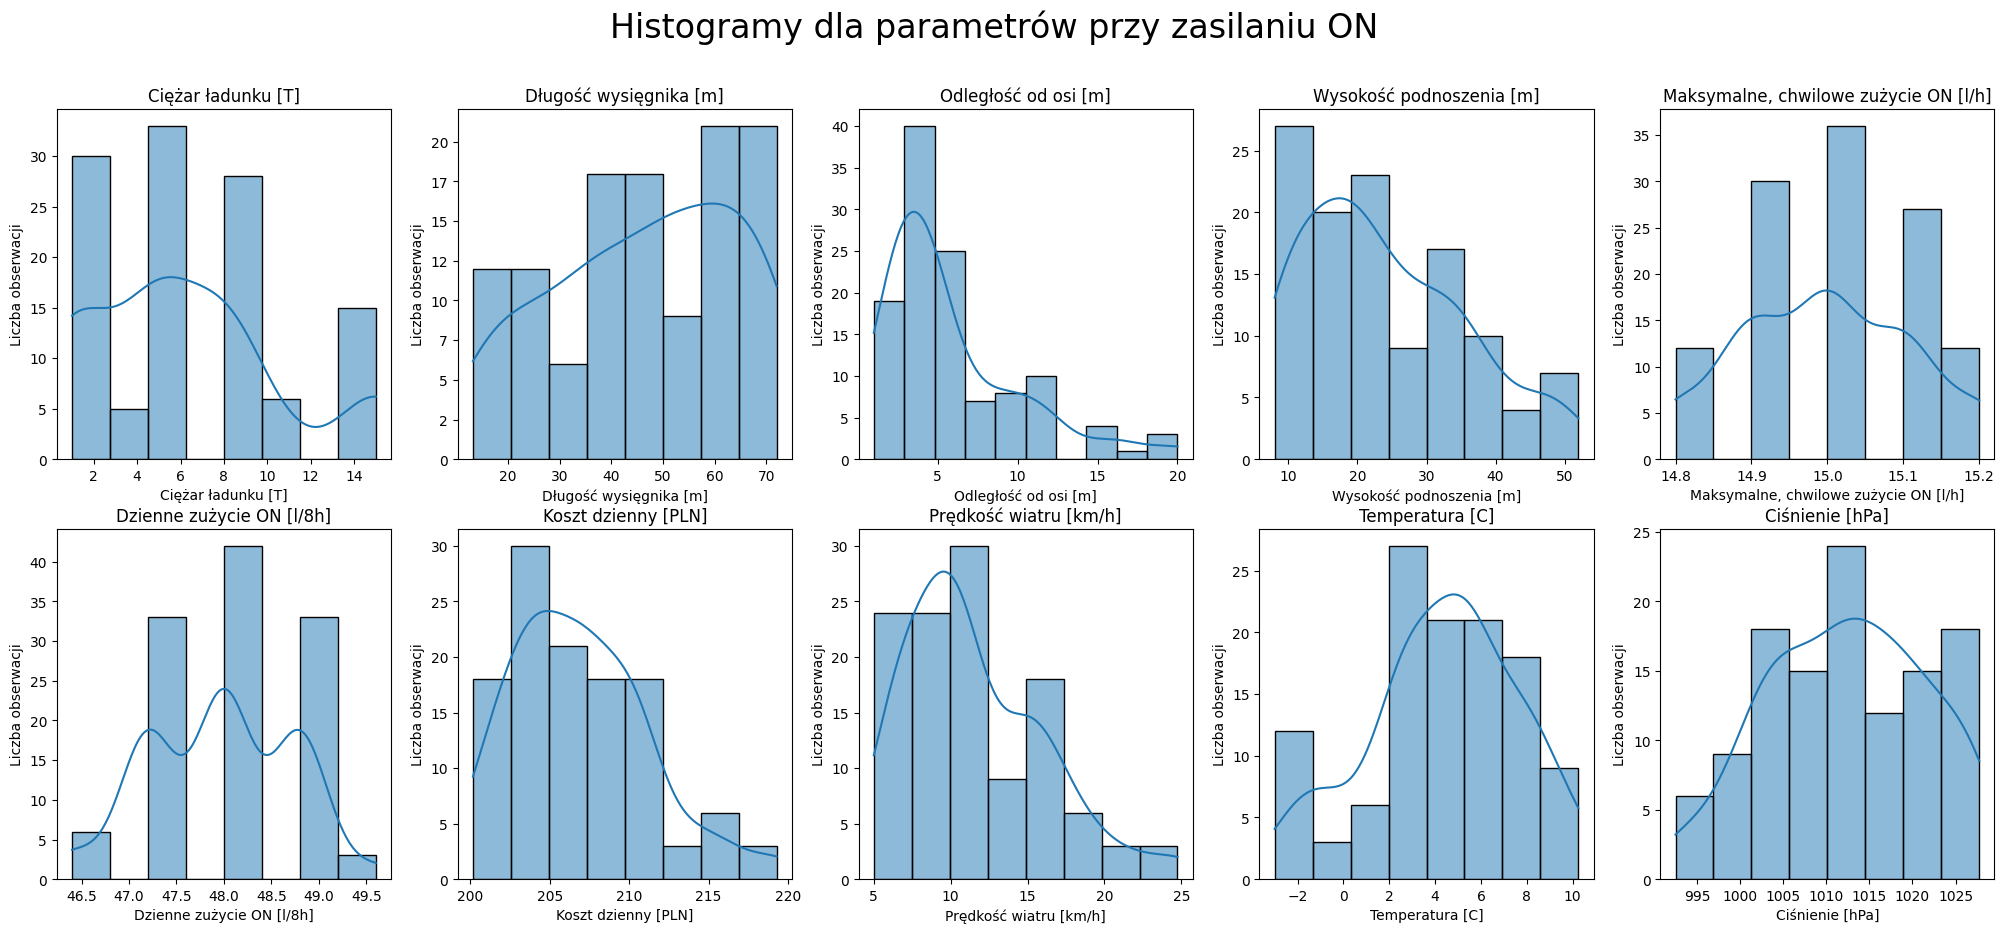

In [14]:
col_on = [
    'Ciężar ładunku [T]', 'Długość wysięgnika [m]', 'Odległość od osi [m]',
    'Wysokość podnoszenia [m]', 'Maksymalne, chwilowe zużycie ON [l/h]',
    'Dzienne zużycie ON [l/8h]', 'Koszt dzienny [PLN]', 'Prędkość wiatru [km/h]',
    'Temperatura [C]', 'Ciśnienie [hPa]']

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))

for i, col in enumerate(col_on, 1):
  plt.subplot(2, 5, i)
  sns.histplot(data=on_inter, x=col, kde=True)
  plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%d')) # formatting y values to be shown without decimal places
  plt.ylabel('Liczba obserwacji')
  plt.title(col)

#plt.tight_layout()
plt.suptitle('Histogramy dla parametrów przy zasilaniu ON', size=24)
plt.show()

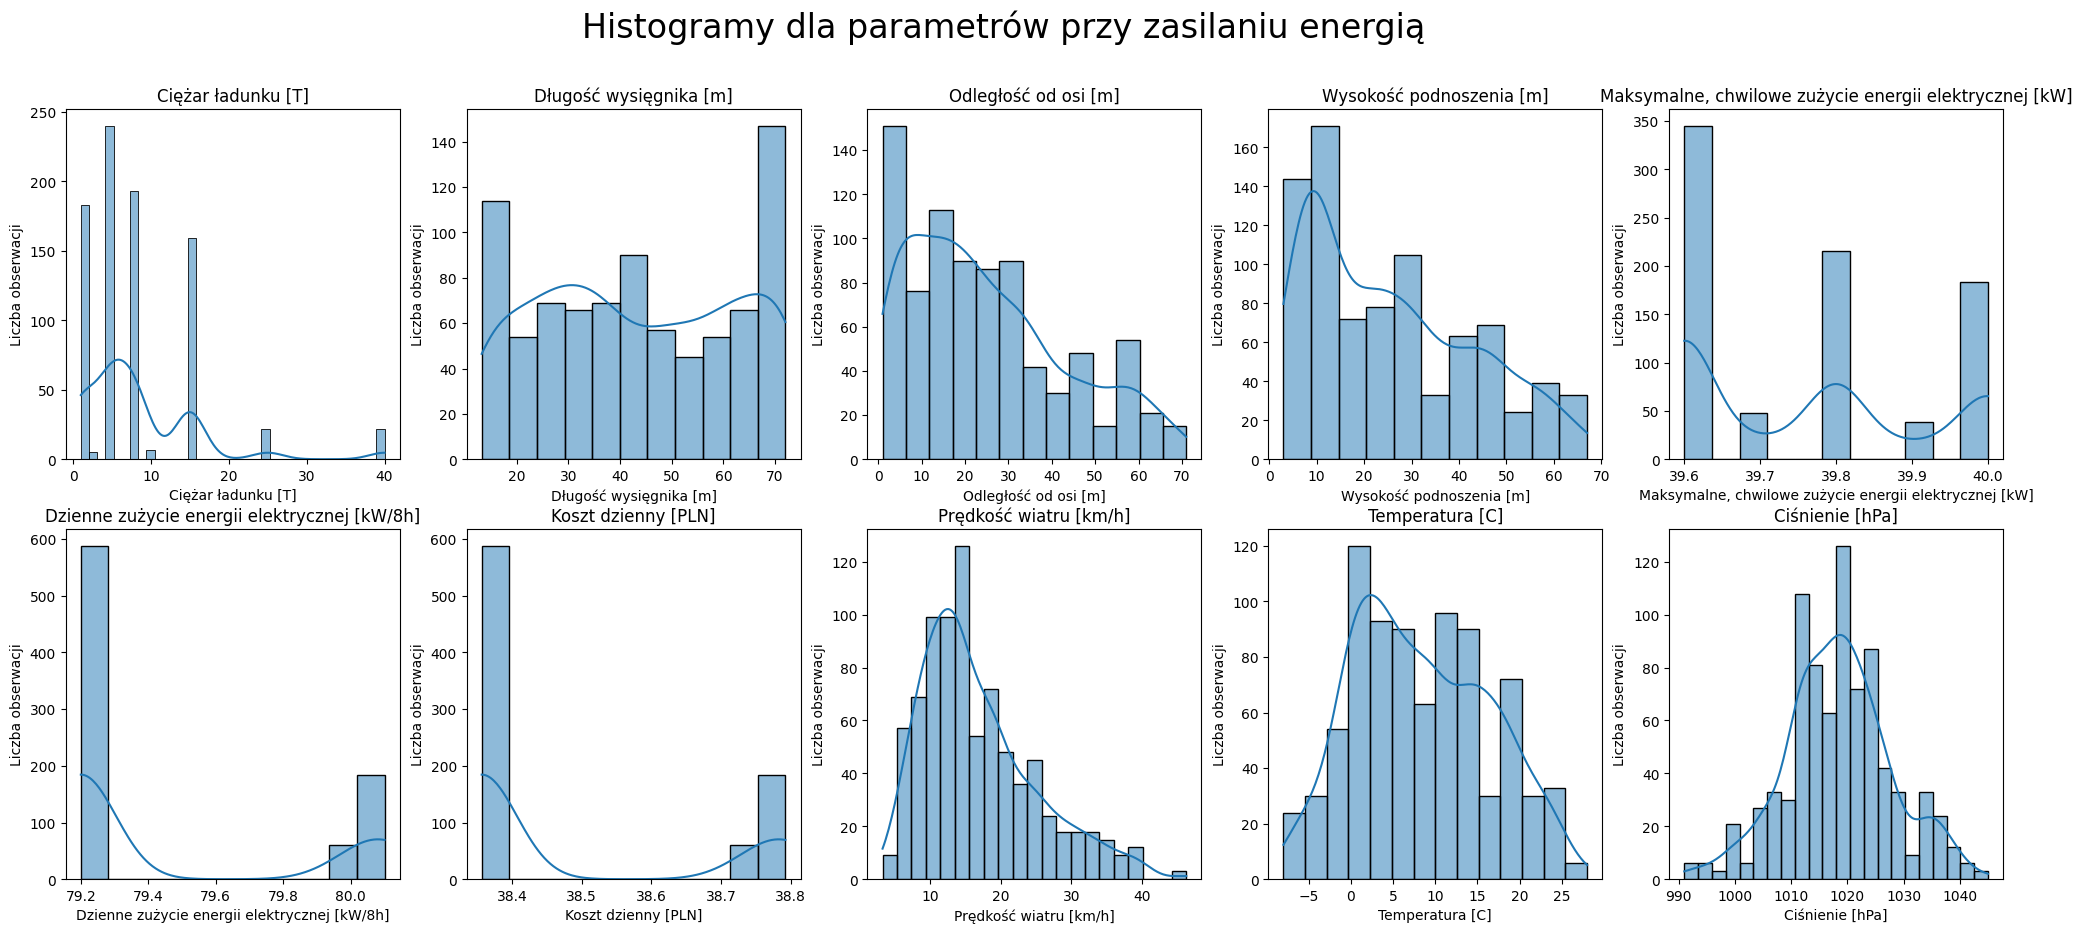

In [16]:
col_en = [
    'Ciężar ładunku [T]', 'Długość wysięgnika [m]', 'Odległość od osi [m]',
    'Wysokość podnoszenia [m]', 'Maksymalne, chwilowe zużycie energii elektrycznej [kW]',
    'Dzienne zużycie energii elektrycznej [kW/8h]',
    'Koszt dzienny [PLN]', 'Prędkość wiatru [km/h]', 'Temperatura [C]', 'Ciśnienie [hPa]']

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))

for i, col in enumerate(col_en, 1):
  plt.subplot(2, 5, i)
  sns.histplot(data=energy, x=col, kde=True)
  plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%d')) # formatting y values to be shown without decimal places
  plt.ylabel('Liczba obserwacji')
  plt.title(col)

#plt.tight_layout()
plt.suptitle('Histogramy dla parametrów przy zasilaniu energią', size=24)
plt.show()

In [17]:
data.loc[data['Koszt dzienny [PLN]'].idxmax()]

Data                                                      12/24/2019
Ciężar ładunku [T]                                                 1
Długość wysięgnika [m]                                          72.0
Odległość od osi [m]                                               8
Wysokość podnoszenia [m]                                          16
Maksymalne, chwilowe zużycie ON [l/h]                           15.2
Dzienne zużycie ON [l/8h]                                       49.6
Cena hurtowa ON 1000l [PLN]                                   4421.0
Maksymalne, chwilowe zużycie energii elektrycznej [kW]           NaN
Dzienne zużycie energii elektrycznej [kW/8h]                     NaN
Cena energii elektrycznej [kWh]                                  NaN
Koszt dzienny [PLN]                                         219.2816
Prędkość wiatru [km/h]                                          15.0
Prędkość wiatru [m/s]                                           4.17
Temperatura [C]                   

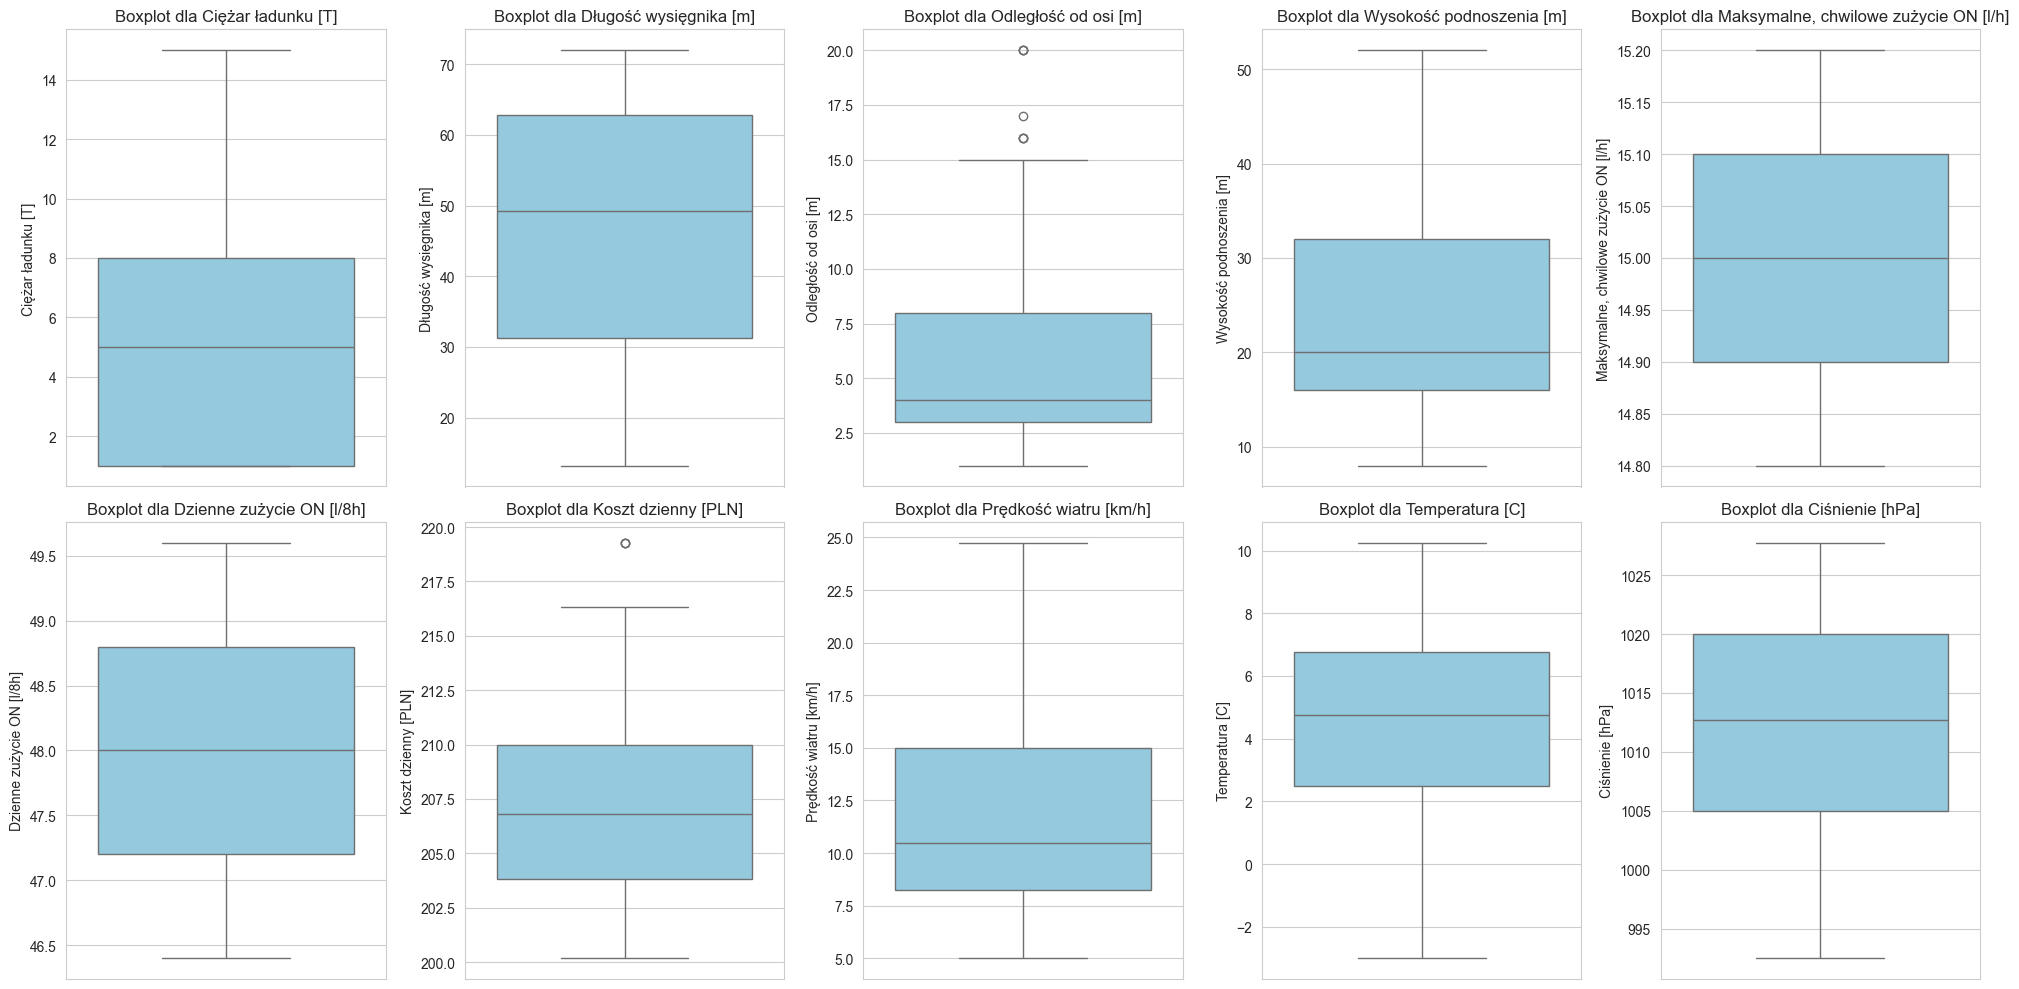

In [18]:
plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")
for i, column in enumerate(col_on, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(data=on_inter, y=column, color='skyblue')
    plt.title(f'Boxplot dla {column}')
plt.tight_layout()
plt.show()

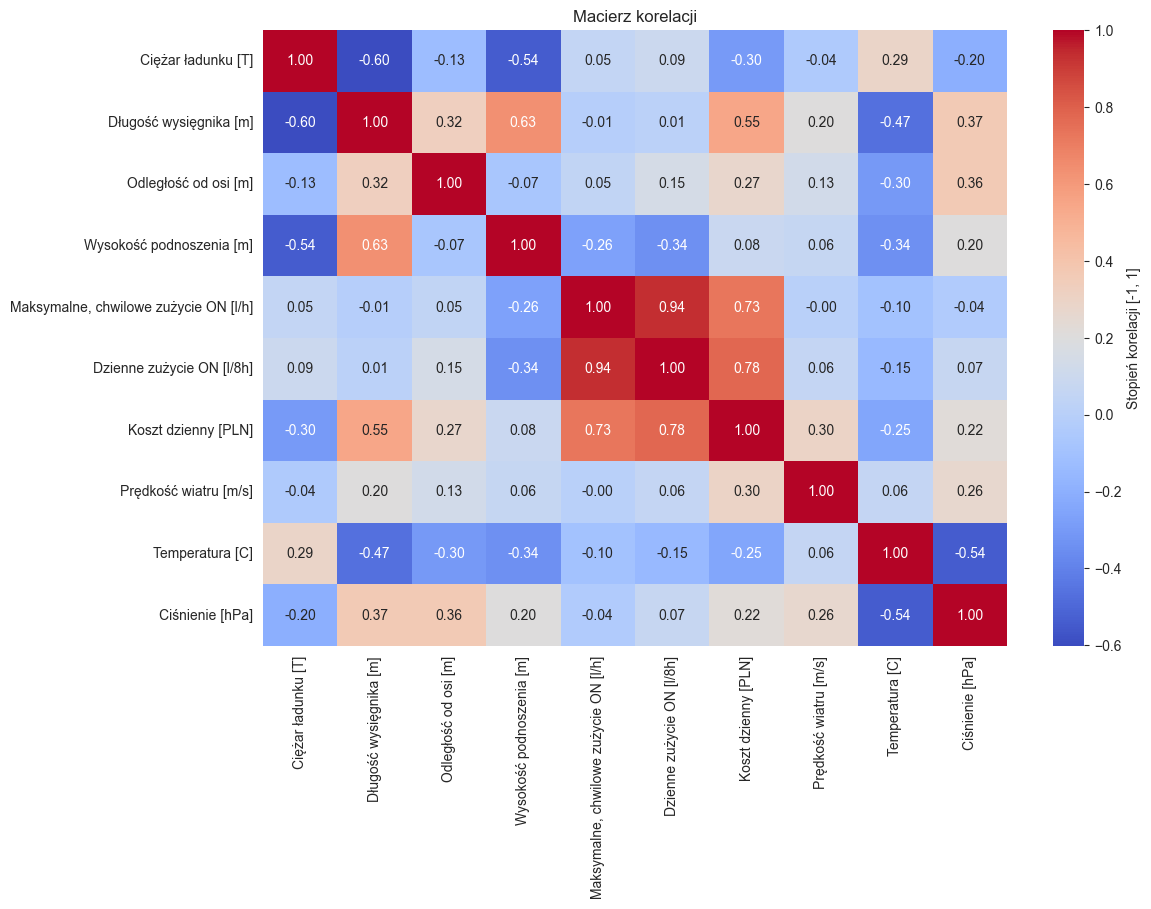

In [19]:
correlation = on_inter.drop(columns=['Data', 'Prędkość wiatru [km/h]', 'Cena hurtowa ON 1000l [PLN]']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Stopień korelacji [-1, 1]'})

plt.title('Macierz korelacji')
plt.show()

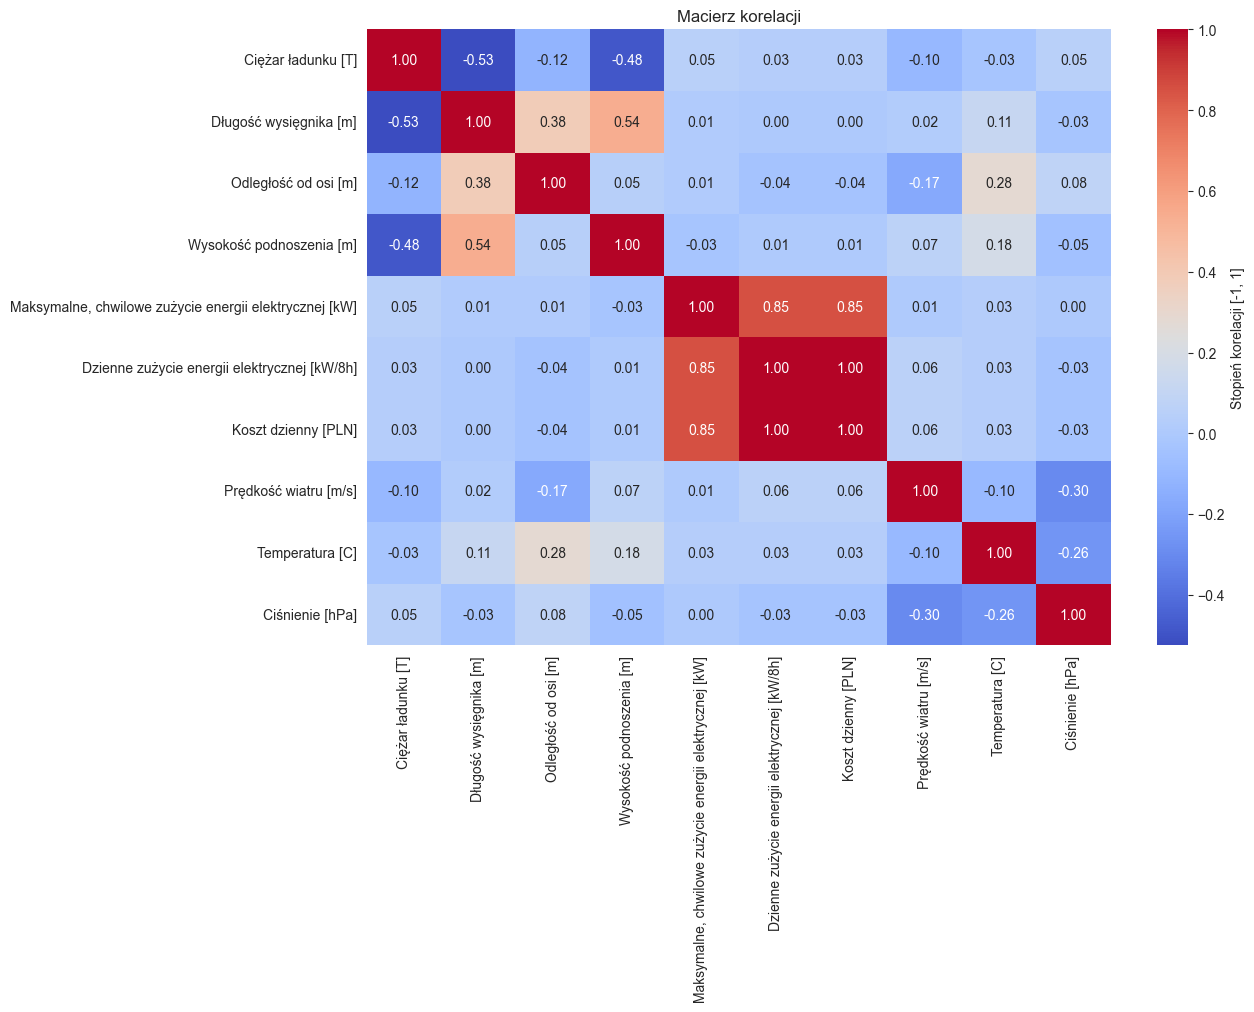

In [20]:
correlation = energy.drop(columns=['Data', 'Prędkość wiatru [km/h]', 'Cena energii elektrycznej [kWh]']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Stopień korelacji [-1, 1]'})

plt.title('Macierz korelacji')
plt.show()